## Import Libraries

In [2]:
import pandas                             as      pd
import numpy                              as      np
import matplotlib.pyplot                  as      plt
import seaborn                            as      sns
from   IPython.display                    import  display
from   pylab                              import  rcParams 
from   datetime                           import  datetime, timedelta
from statsmodels.tsa.stattools            import  adfuller
from statsmodels.tsa.stattools            import  pacf
from statsmodels.tsa.stattools            import  acf
from statsmodels.graphics.tsaplots        import  plot_pacf
from statsmodels.graphics.tsaplots        import  plot_acf
from statsmodels.graphics.gofplots        import  qqplot
from statsmodels.tsa.seasonal             import  seasonal_decompose
from statsmodels.tsa.arima_model          import  ARIMA
from statsmodels.tsa.statespace.sarimax   import  SARIMAX
from statsmodels.tsa.api                  import  ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Read the train Dataset 

In [3]:
df=pd.read_csv("train_.csv")

In [4]:
df.head()

,Month,Avg_sunspot_count
0,01-01-1749,97
1,02-01-1749,104
2,03-01-1749,117
3,04-01-1749,93
4,05-01-1749,142


In [5]:
df.tail()

,Month,Avg_sunspot_count
3139,08-01-2010,30
3140,09-01-2010,36
3141,10-01-2010,34
3142,11-01-2010,34
3143,12-01-2010,25


### Time Stamp

In [6]:
date = pd.date_range(start='1/1/1749', end='31/12/2010', freq='M')
date

DatetimeIndex(['1749-01-31', '1749-02-28', '1749-03-31', '1749-04-30',
               '1749-05-31', '1749-06-30', '1749-07-31', '1749-08-31',
               '1749-09-30', '1749-10-31',
               ...
               '2010-03-31', '2010-04-30', '2010-05-31', '2010-06-30',
               '2010-07-31', '2010-08-31', '2010-09-30', '2010-10-31',
               '2010-11-30', '2010-12-31'],
              dtype='datetime64[ns]', length=3144, freq='M')

In [7]:
df['Time_Stamp'] = pd.DataFrame(date)

In [8]:
df=df.set_index('Time_Stamp')

In [9]:
df.head()

,Month,Avg_sunspot_count
Time_Stamp,,
1749-01-31,01-01-1749,97
1749-02-28,02-01-1749,104
1749-03-31,03-01-1749,117
1749-04-30,04-01-1749,93
1749-05-31,05-01-1749,142


In [10]:
df.tail()

,Month,Avg_sunspot_count
Time_Stamp,,
2010-08-31,08-01-2010,30
2010-09-30,09-01-2010,36
2010-10-31,10-01-2010,34
2010-11-30,11-01-2010,34
2010-12-31,12-01-2010,25


In [11]:
df.drop(['Month'],axis=1,inplace=True)

In [12]:
df.head()

,Avg_sunspot_count
Time_Stamp,
1749-01-31,97
1749-02-28,104
1749-03-31,117
1749-04-30,93
1749-05-31,142


In [13]:
df.tail()

,Avg_sunspot_count
Time_Stamp,
2010-08-31,30
2010-09-30,36
2010-10-31,34
2010-11-30,34
2010-12-31,25


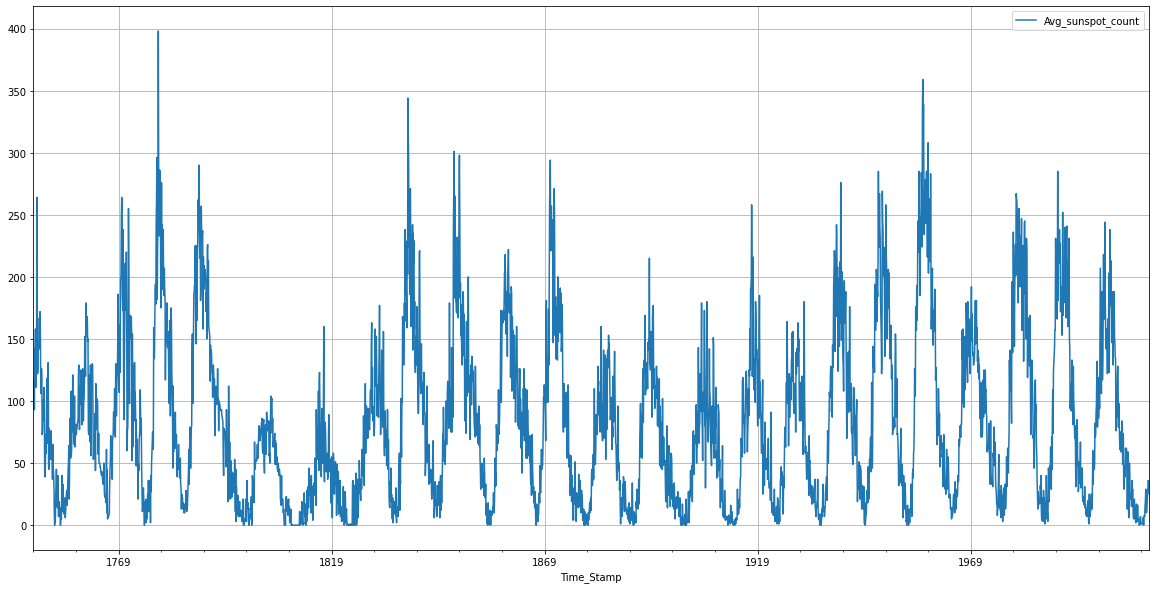

In [14]:
rcParams['figure.figsize'] = [20,10]
df.plot()
plt.grid()

## Finding Missing Values

In [15]:
df.isnull().sum()

Avg_sunspot_count    0
dtype: int64

There are no missing values

<AxesSubplot:xlabel='Time_Stamp'>

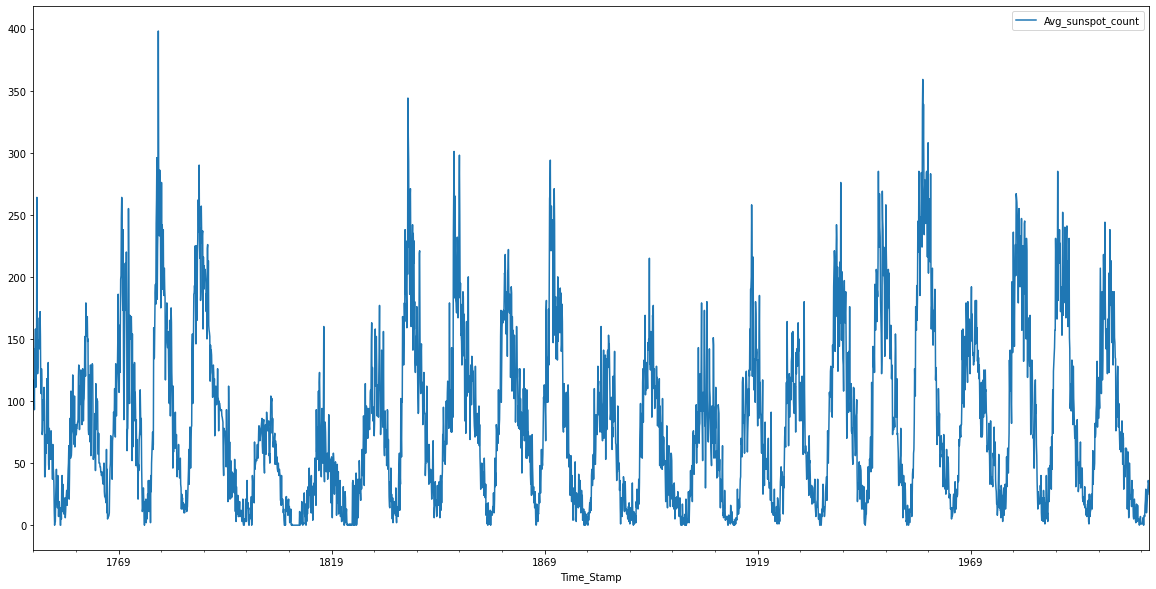

In [16]:
df.plot()

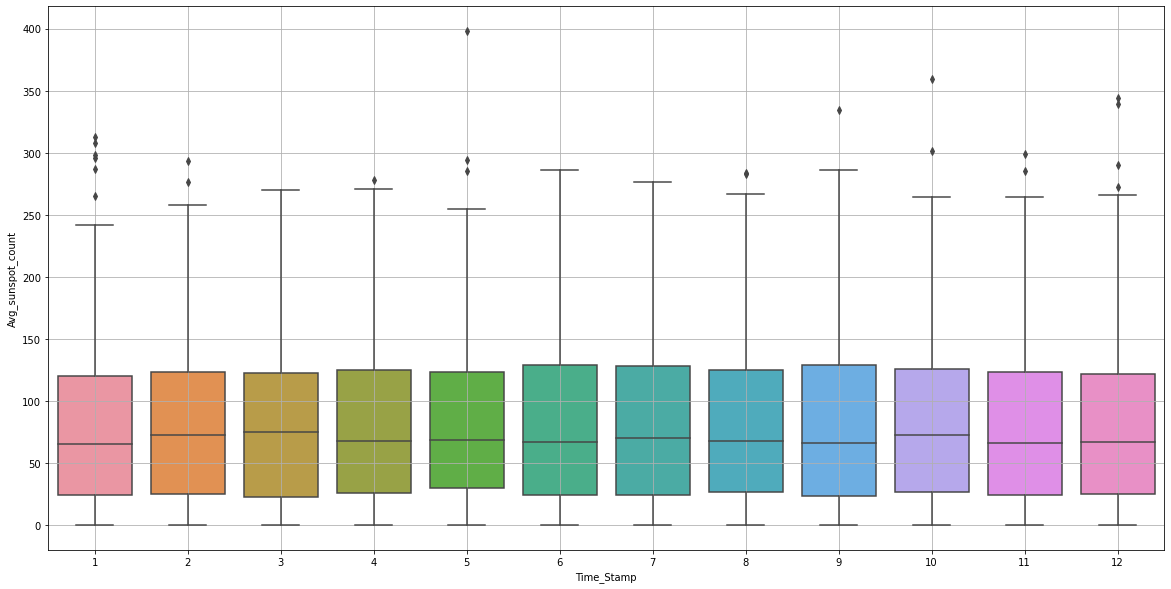

In [17]:
sns.boxplot(x=df.index.month,y=df['Avg_sunspot_count'])
plt.grid();

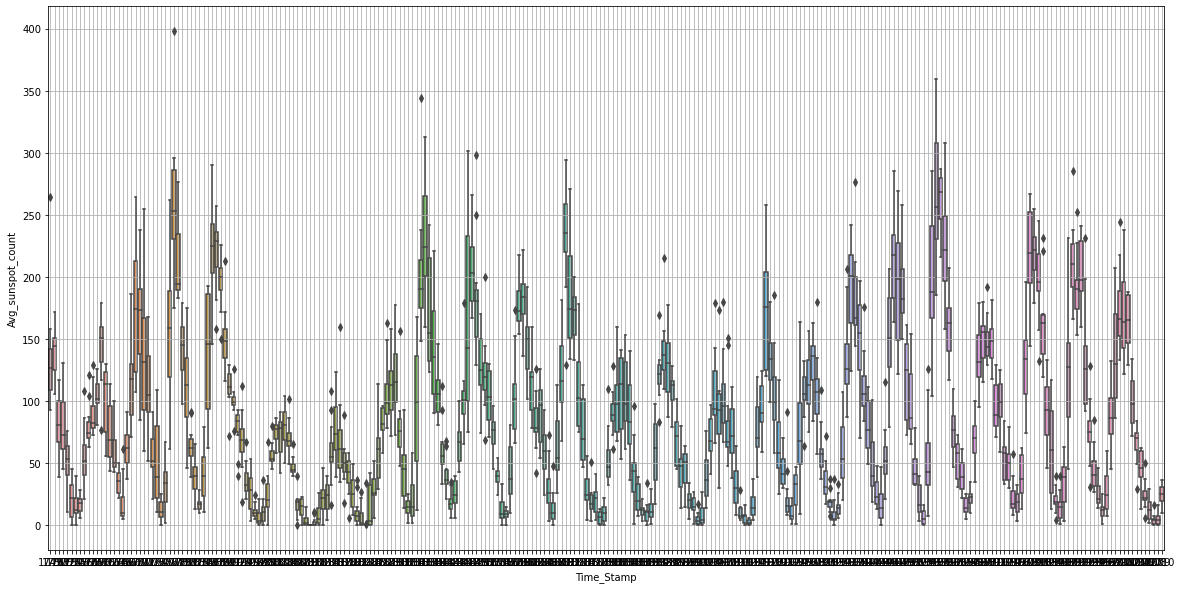

In [18]:
sns.boxplot(x=df.index.year,y=df['Avg_sunspot_count'])
plt.grid();

In [19]:
avg_sunspots_across_year = pd.pivot_table(df, values = 'Avg_sunspot_count', 
                                          columns = df.index.month_name(),
                                          index = df.index.year)
avg_sunspots_across_year

Time_Stamp,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
1749,93,111,142,104,97,158,139,117,142,264,126,127
1750,147,172,126,127,122,142,167,149,150,106,110,152
1751,94,100,73,73,117,111,85,76,101,48,39,39
1752,99,49,67,83,58,131,66,118,100,63,78,45
1753,63,65,11,53,73,37,53,76,60,33,42,47
...,...,...,...,...,...,...,...,...,...,...,...,...
2006,50,21,22,6,21,22,25,17,37,36,15,24
2007,5,10,17,18,29,15,21,7,20,3,2,4
2008,4,0,1,3,4,1,5,16,5,7,4,1


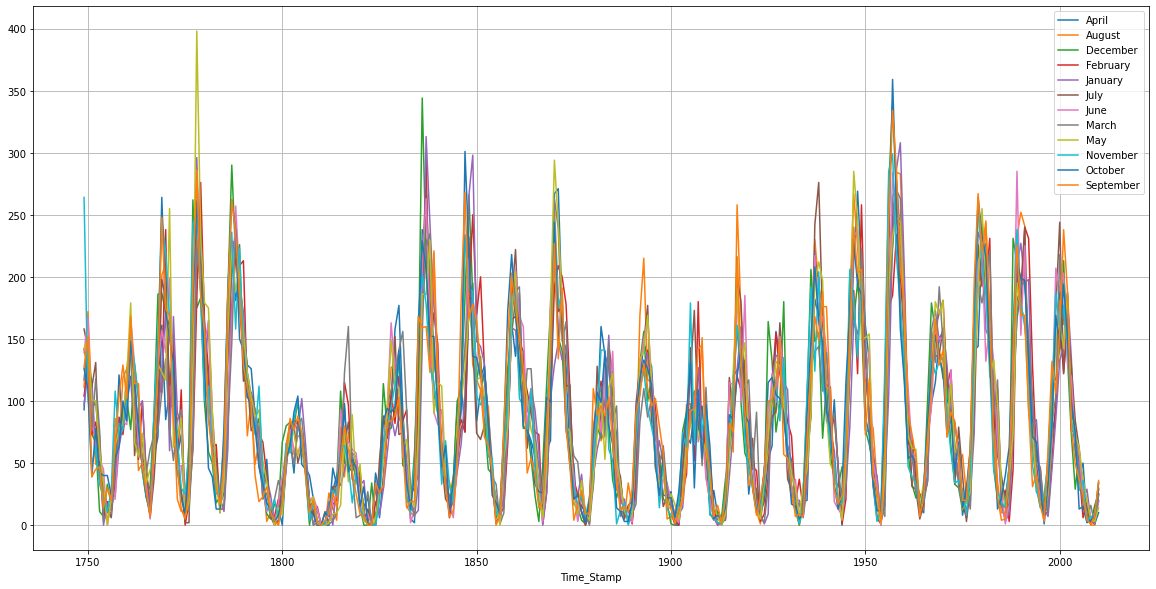

In [20]:
rcParams['figure.figsize'] = 20,10
avg_sunspots_across_year.plot()
plt.grid()
plt.legend(loc='best');

## DECOMPOSITION

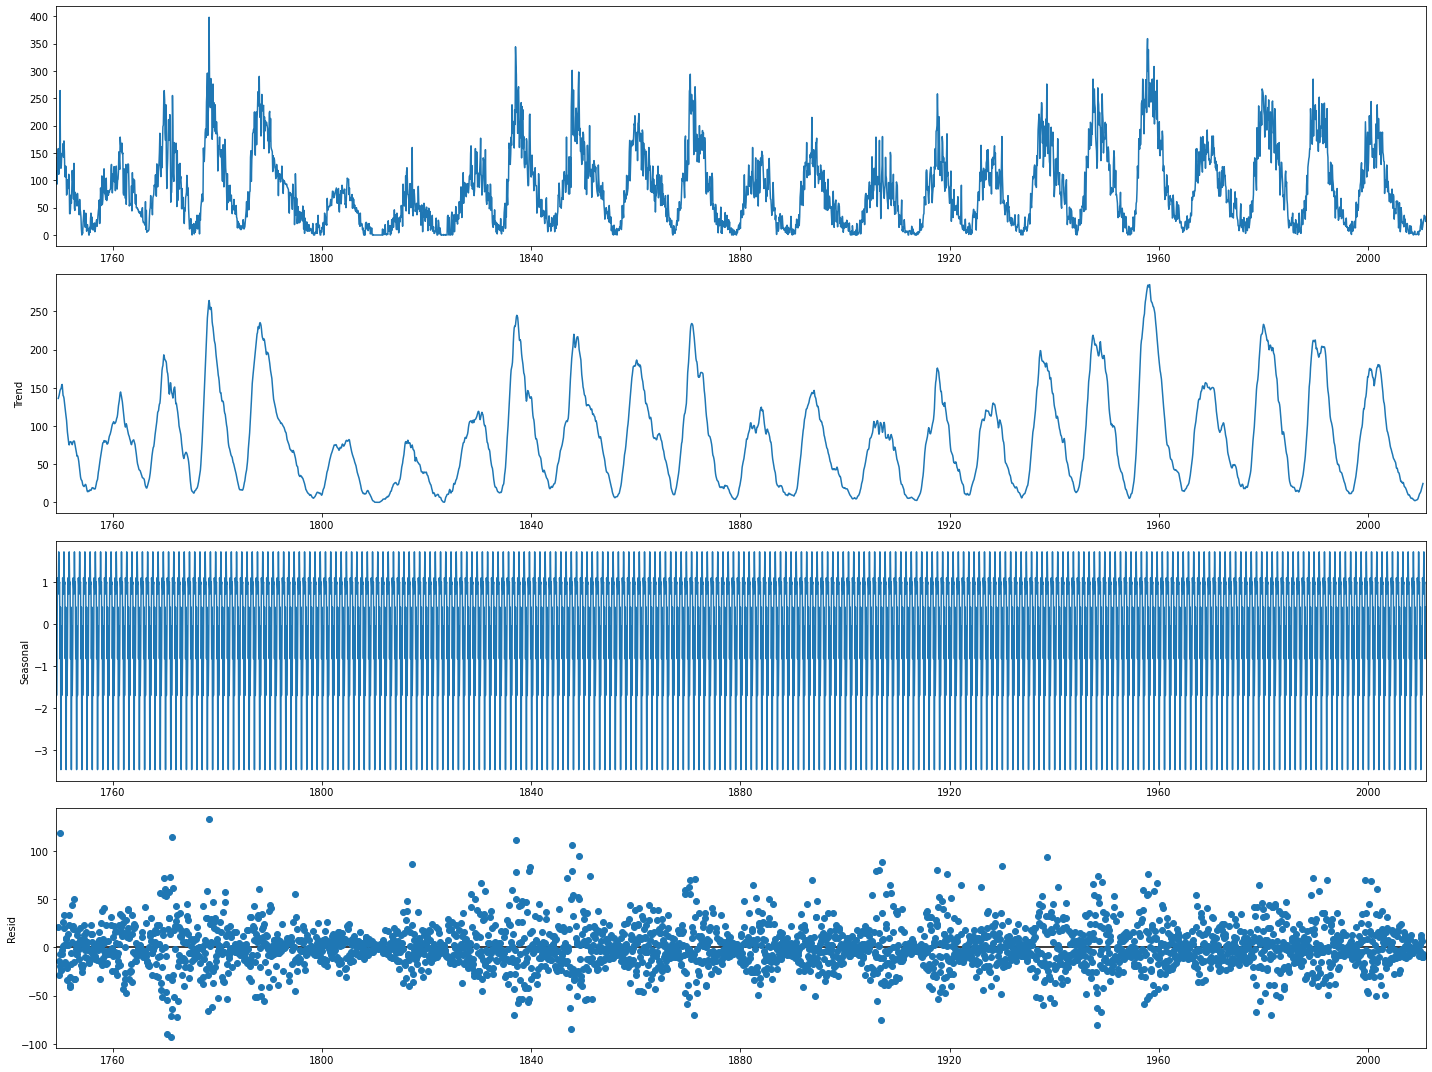

In [21]:
rcParams['figure.figsize'] = [20,15]
decomposition = seasonal_decompose(df, model = 'additive')
decomposition.plot()
plt.show()

## Rolling Mean and Standred deviation 

In [22]:
rolmean = df.rolling(window=15).mean()
rolstd = df.rolling(window=15).std()

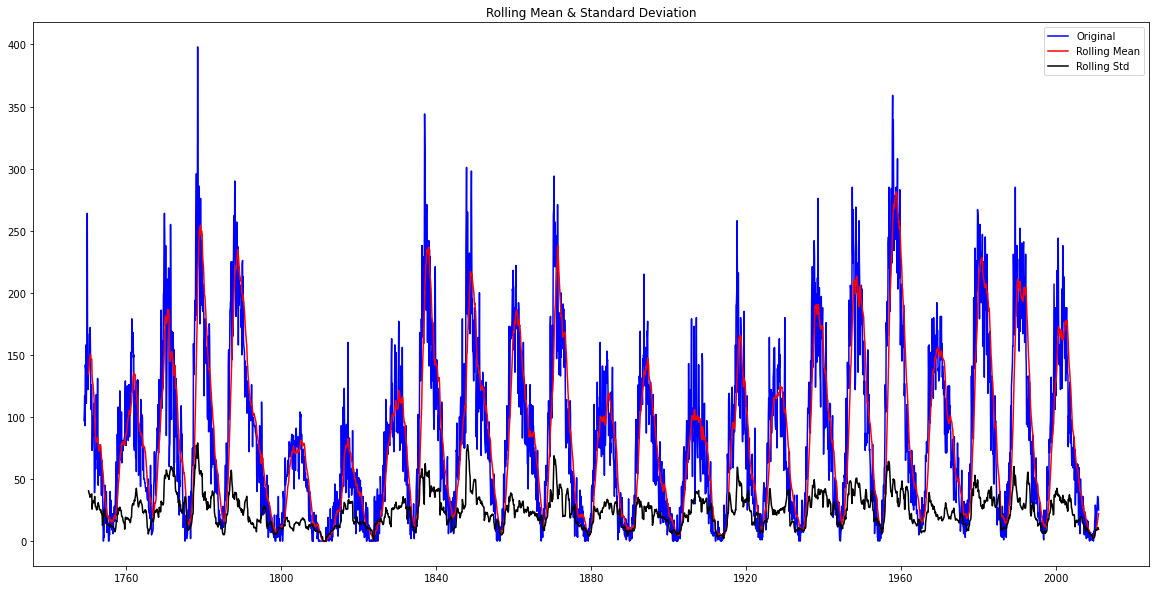

In [23]:
rcParams['figure.figsize'] = [20,10]
orig = plt.plot(df, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

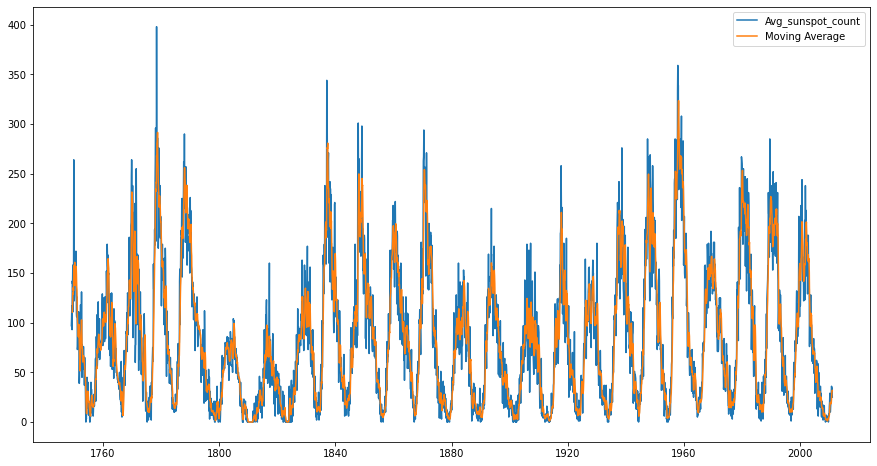

In [24]:
plt.figure(figsize=(15,8))
plt.plot(df, label='Avg_sunspot_count')
plt.plot(df.rolling(5).mean(), label='Moving Average')
plt.legend(loc='best')
plt.show()

## Stationary Check

In [25]:
def test_stationarity(ts_data, column='', signif=0.05, series=False):
    if series:
        adf_test = adfuller(ts_data, autolag='AIC')
    else:
        adf_test = adfuller(ts_data[column], autolag='AIC')
    p_value = adf_test[1]
    if p_value <= signif:
        test_result = "Stationary"
    else:
        test_result = "Non-Stationary"
    return test_result

In [26]:
test_stationarity(df,'Avg_sunspot_count')

'Stationary'

## Statisctical test

In [27]:
observations= df.values
test_result = adfuller(observations)

In [28]:
print('ADF Statistic: %f' % test_result[0])
print('p-value: %f' % test_result[1])
print('Critical Values:')
for key, value in test_result[4].items():
    print('\t%s: %.5f' % (key, value))

ADF Statistic: -10.390309
p-value: 0.000000
Critical Values:
	1%: -3.43245
	5%: -2.86247
	10%: -2.56726


In [29]:
df.head()

,Avg_sunspot_count
Time_Stamp,
1749-01-31,97
1749-02-28,104
1749-03-31,117
1749-04-30,93
1749-05-31,142


In [30]:
df.tail()

,Avg_sunspot_count
Time_Stamp,
2010-08-31,30
2010-09-30,36
2010-10-31,34
2010-11-30,34
2010-12-31,25


### Spliting

In [31]:
train_end=datetime(2008,12,1)
test_end=datetime(2020,12,1)

In [32]:
train             = df[:train_end] 
test              = df[train_end + timedelta(days=1):test_end]

In [33]:
train.shape

(3119, 1)

In [34]:
test.shape

(25, 1)

## Model Building

### ARIMA

In [35]:
import itertools
p = q = range(0, 2)
d= range(0,2)
pdq = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2],7) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 7)
Model: (0, 0, 1)(0, 1, 0, 7)
Model: (0, 1, 0)(0, 1, 1, 7)
Model: (0, 1, 0)(1, 0, 0, 7)


In [36]:
model_pdq

[(0, 0, 0, 7),
 (0, 0, 1, 7),
 (0, 1, 0, 7),
 (0, 1, 1, 7),
 (1, 0, 0, 7),
 (1, 0, 1, 7),
 (1, 1, 0, 7),
 (1, 1, 1, 7)]

### Creating an empty Dataframe with column names only where the model and AIC scores will be saved

In [37]:
dfObj1 = pd.DataFrame(columns=['param', 'AIC'])
dfObj1

,param,AIC


### Model parameter selection using hypertuning

In [38]:
#model parameters
for param in pdq:
            try:
                mod = ARIMA(train, order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                dfObj1 = dfObj1.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)

            except:
                continue

ARIMA(0, 0, 0) - AIC:35214.38977092999
ARIMA(0, 0, 1) - AIC:32752.246399969732
ARIMA(0, 1, 0) - AIC:29605.254122517264
ARIMA(0, 1, 1) - AIC:29117.108786496865
ARIMA(1, 0, 0) - AIC:29485.987930162246
ARIMA(1, 0, 1) - AIC:29096.715172313547
ARIMA(1, 1, 0) - AIC:29305.726519017822
ARIMA(1, 1, 1) - AIC:29072.722087642185


In [39]:
dfObj1.sort_values(by=['AIC'])

,param,AIC
7,"(1, 1, 1)",29072.722088
5,"(1, 0, 1)",29096.715172
3,"(0, 1, 1)",29117.108786
6,"(1, 1, 0)",29305.726519
4,"(1, 0, 0)",29485.987930
2,"(0, 1, 0)",29605.254123
1,"(0, 0, 1)",32752.246400
0,"(0, 0, 0)",35214.389771


In [40]:
model = ARIMA(train, order=(1,1,1))

model_Arima = model.fit()

print(model_Arima.summary())

                              ARIMA Model Results                              
Dep. Variable:     D.Avg_sunspot_count   No. Observations:                 3118
Model:                  ARIMA(1, 1, 1)   Log Likelihood              -14532.361
Method:                        css-mle   S.D. of innovations             25.580
Date:                 Sun, 19 Dec 2021   AIC                          29072.722
Time:                         18:57:17   BIC                          29096.902
Sample:                     02-28-1749   HQIC                         29081.402
                          - 11-30-2008                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0328      0.210     -0.156      0.876      -0.445       0.379
ar.L1.D.Avg_sunspot_count     0.2186      0.030      7.169      0.000       0.

### Predicting Results of ARIMA

In [41]:
pred_start=test.index[0]
pred_end=test.index[-1]

In [42]:
ARIMA_predictions=model_Arima.predict(start=pred_start, end=pred_end)

In [43]:
forecast=model_Arima.forecast(len(test))

In [44]:
ARIMA_predictions

2008-12-31   -1.853103
2009-01-31   -0.430712
2009-02-28   -0.119796
2009-03-31   -0.051833
2009-04-30   -0.036977
2009-05-31   -0.033730
2009-06-30   -0.033020
2009-07-31   -0.032865
2009-08-31   -0.032831
2009-09-30   -0.032824
2009-10-31   -0.032822
2009-11-30   -0.032822
2009-12-31   -0.032822
2010-01-31   -0.032822
2010-02-28   -0.032822
2010-03-31   -0.032822
2010-04-30   -0.032822
2010-05-31   -0.032822
2010-06-30   -0.032822
2010-07-31   -0.032822
2010-08-31   -0.032822
2010-09-30   -0.032822
2010-10-31   -0.032822
2010-11-30   -0.032822
2010-12-31   -0.032822
Freq: M, dtype: float64

## Invert Transformation

In [45]:
ARIMA_pred=ARIMA_predictions.cumsum()
ARIMA_pred=pd.DataFrame(ARIMA_pred,columns=train.columns)

In [46]:
df_fc = ARIMA_pred.copy()
columns = train.columns
for col in columns:        
        df_fc[str(col)+'_forecast'] = train[col].iloc[-1] + df_fc[str(col)]

In [47]:
df_fc.head()

,Avg_sunspot_count,Avg_sunspot_count_forecast
2008-12-31,-1.853103,5.146897
2009-01-31,-2.283816,4.716184
2009-02-28,-2.403611,4.596389
2009-03-31,-2.455445,4.544555
2009-04-30,-2.492422,4.507578


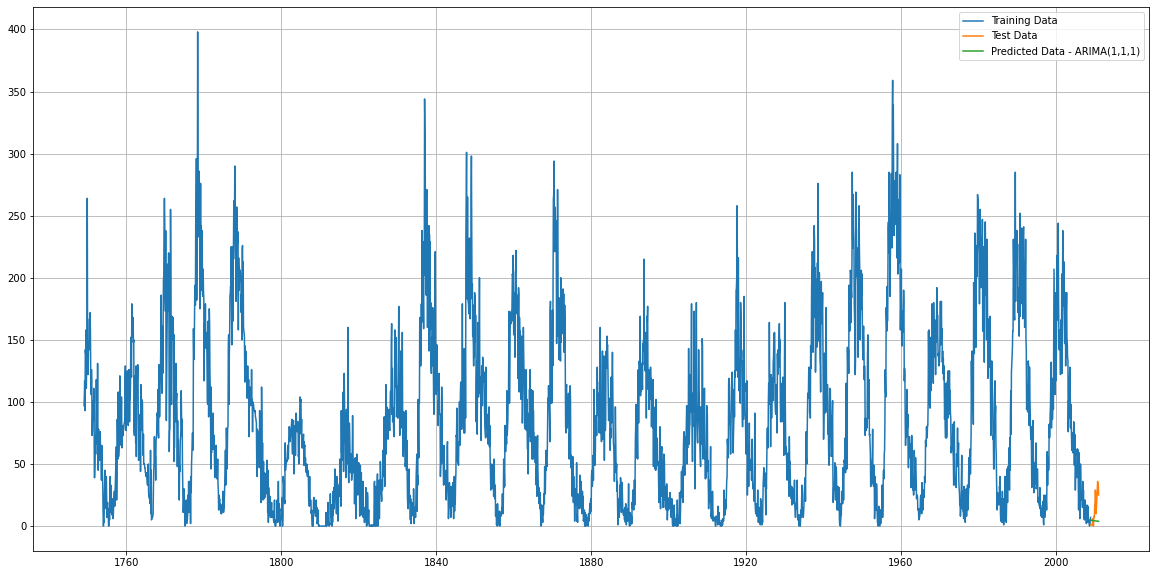

In [48]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,df_fc['Avg_sunspot_count_forecast'],label='Predicted Data - ARIMA(1,1,1)')
plt.legend(loc='best')
plt.grid();

### Model parameter selection using hypertuning

In [49]:
residuals = test.Avg_sunspot_count - df_fc['Avg_sunspot_count_forecast']

### Calculating RSME and MAPE

In [50]:
from math import sqrt
from sklearn.metrics import  mean_squared_error
rmse = sqrt(mean_squared_error(test.Avg_sunspot_count,df_fc['Avg_sunspot_count_forecast']))
print(rmse)

15.851570657938458


In [51]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [52]:
mape = MAPE(test['Avg_sunspot_count'].values,df_fc['Avg_sunspot_count_forecast'].values)
print(mape)

inf


### Creating new dataframe for storing the results

In [53]:
resultsDf = pd.DataFrame({'Test RMSE': rmse,'Test MAPE':mape}
                           ,index=['ARIMA(1,1,1)'])

resultsDf

,Test RMSE,Test MAPE
"ARIMA(1,1,1)",15.851571,inf


## SARIMA

In [54]:
import itertools
p = q = range(0, 2)
d= range(0,2)
pdq = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 7)
Model: (0, 0, 1)(0, 1, 0, 7)
Model: (0, 1, 0)(0, 1, 1, 7)
Model: (0, 1, 0)(1, 0, 0, 7)


### Creating new parameter

In [55]:
dfObj2 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
dfObj2

,param,seasonal,AIC


In [56]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = mod.fit()
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        dfObj2 = dfObj2.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 7)7 - AIC:38047.42094980998
SARIMA(0, 0, 0)x(0, 0, 1, 7)7 - AIC:35455.951486991995
SARIMA(0, 0, 0)x(0, 1, 0, 7)7 - AIC:32092.114211452863
SARIMA(0, 0, 0)x(0, 1, 1, 7)7 - AIC:31967.905618872006
SARIMA(0, 0, 0)x(1, 0, 0, 7)7 - AIC:31978.838869356503
SARIMA(0, 0, 0)x(1, 0, 1, 7)7 - AIC:31948.778659085627
SARIMA(0, 0, 0)x(1, 1, 0, 7)7 - AIC:31960.764855437785
SARIMA(0, 0, 0)x(1, 1, 1, 7)7 - AIC:31904.511144277225
SARIMA(0, 0, 1)x(0, 0, 0, 7)7 - AIC:34968.17118472088
SARIMA(0, 0, 1)x(0, 0, 1, 7)7 - AIC:33405.87710033113
SARIMA(0, 0, 1)x(0, 1, 0, 7)7 - AIC:31296.86643284685
SARIMA(0, 0, 1)x(0, 1, 1, 7)7 - AIC:30988.998093375856
SARIMA(0, 0, 1)x(1, 0, 0, 7)7 - AIC:31126.445518658093
SARIMA(0, 0, 1)x(1, 0, 1, 7)7 - AIC:30964.123337047866
SARIMA(0, 0, 1)x(1, 1, 0, 7)7 - AIC:30962.021008611224
SARIMA(0, 0, 1)x(1, 1, 1, 7)7 - AIC:30938.938502546473
SARIMA(0, 1, 0)x(0, 0, 0, 7)7 - AIC:29594.700614799796
SARIMA(0, 1, 0)x(0, 0, 1, 7)7 - AIC:29527.06980458804
SARIMA(0, 1, 0)

### Sorting the value

In [57]:
dfObj2.sort_values(by=['AIC'])

,param,seasonal,AIC
59,"(1, 1, 1)","(0, 1, 1, 7)",28942.846480
63,"(1, 1, 1)","(1, 1, 1, 7)",28944.838085
43,"(1, 0, 1)","(0, 1, 1, 7)",28965.762285
47,"(1, 0, 1)","(1, 1, 1, 7)",28967.704927
61,"(1, 1, 1)","(1, 0, 1, 7)",28976.749399
...,...,...,...
2,"(0, 0, 0)","(0, 1, 0, 7)",32092.114211
9,"(0, 0, 1)","(0, 0, 1, 7)",33405.877100
8,"(0, 0, 1)","(0, 0, 0, 7)",34968.171185
1,"(0, 0, 0)","(0, 0, 1, 7)",35455.951487


In [58]:
model = sm.tsa.statespace.SARIMAX(train,
                                order=(1,1,1),
                                seasonal_order=(0,1,1,7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
model_Sarima = model.fit()
print(model_Sarima.summary())

                                     SARIMAX Results                                     
Dep. Variable:                 Avg_sunspot_count   No. Observations:                 3119
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 7)   Log Likelihood              -14467.423
Date:                           Sun, 19 Dec 2021   AIC                          28942.846
Time:                                   18:58:32   BIC                          28967.006
Sample:                               01-31-1749   HQIC                         28951.522
                                    - 11-30-2008                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2218      0.028      8.042      0.000       0.168       0.276
ma.L1         -0.6412      0.022    -29.638

In [59]:
SARIMA_predictions=model_Sarima.predict(start=pred_start, end=pred_end)

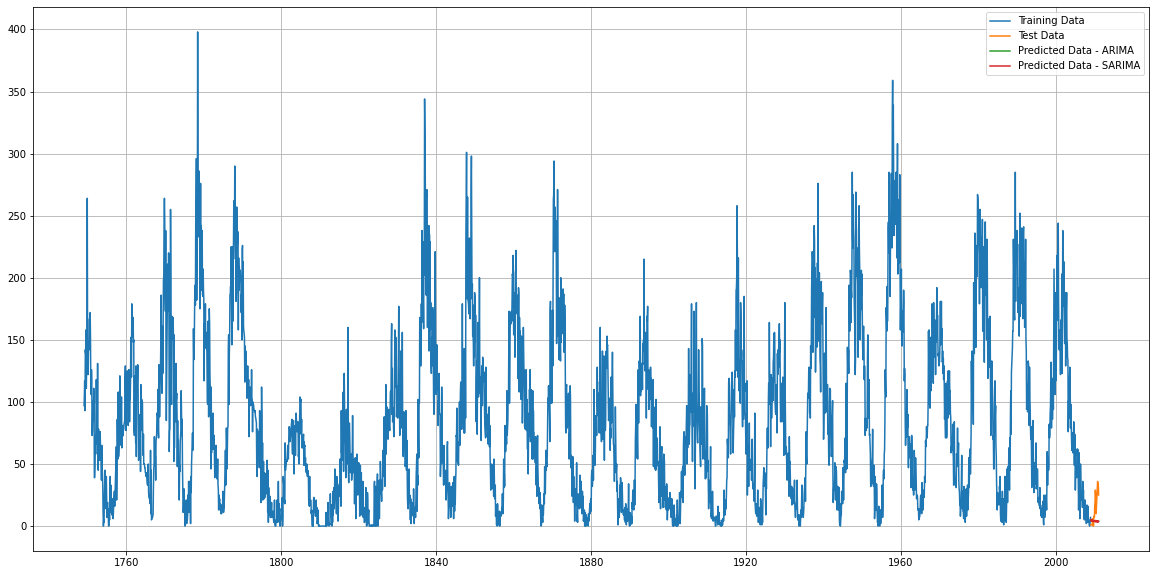

In [60]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,df_fc['Avg_sunspot_count_forecast'],label='Predicted Data - ARIMA')
plt.plot(test.index,SARIMA_predictions,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

In [61]:
rmse = sqrt(mean_squared_error(test.Avg_sunspot_count,SARIMA_predictions))
print(rmse)

15.976151277503282


In [62]:
mape = MAPE(test.Avg_sunspot_count,SARIMA_predictions)
print(mape)

inf


In [63]:
resultsDfsarima = pd.DataFrame({'Test RMSE': rmse, 'Test MAPE':mape}
                           ,index=['SARIMA(1, 1, 1)(0, 1, 1)7'])

resultsDf = pd.concat([resultsDf, resultsDfsarima])
resultsDf

,Test RMSE,Test MAPE
"ARIMA(1,1,1)",15.851571,inf
"SARIMA(1, 1, 1)(0, 1, 1)7",15.976151,inf


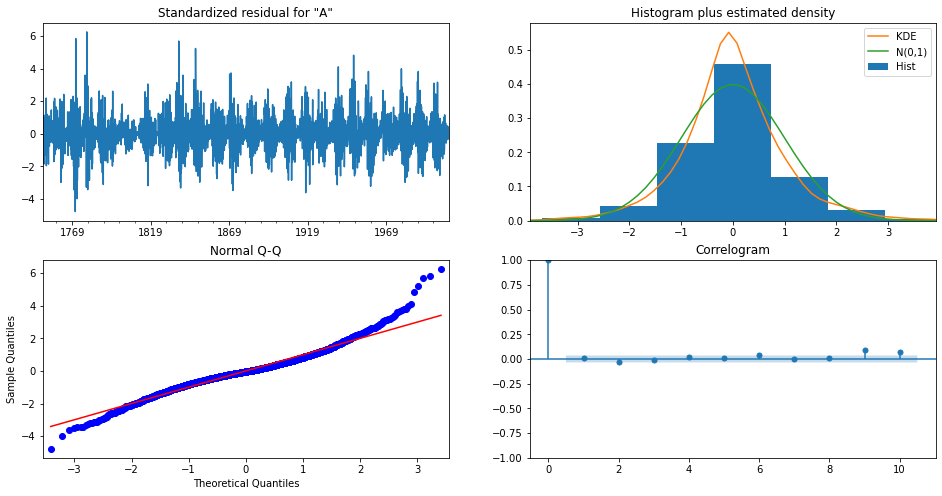

In [64]:
#model residual analysis
model_Sarima.plot_diagnostics(figsize=(16, 8))
plt.show()

### SARIMAX

In [65]:
dfObj3 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
dfObj3

,param,seasonal,AIC


In [66]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train,exog=train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMAX = mod.fit()
        print('SARIMA{}{} - AIC:{}'.format(param, param_seasonal, results_SARIMAX.aic))
        dfObj3 = dfObj3.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)

SARIMA(0, 0, 0)(0, 0, 0, 7) - AIC:-66060.10250649002
SARIMA(0, 0, 0)(0, 0, 1, 7) - AIC:-65908.44991597928
SARIMA(0, 0, 0)(0, 1, 0, 7) - AIC:-65784.65884626411
SARIMA(0, 0, 0)(0, 1, 1, 7) - AIC:-65761.28558288395
SARIMA(0, 0, 0)(1, 0, 0, 7) - AIC:-65930.97466330882
SARIMA(0, 0, 0)(1, 0, 1, 7) - AIC:-65905.43208187034
SARIMA(0, 0, 0)(1, 1, 0, 7) - AIC:-65782.6588462641
SARIMA(0, 0, 0)(1, 1, 1, 7) - AIC:-65757.28338667622
SARIMA(0, 0, 1)(0, 0, 0, 7) - AIC:-66036.43609811837
SARIMA(0, 0, 1)(0, 0, 1, 7) - AIC:-65884.75503519521
SARIMA(0, 0, 1)(0, 1, 0, 7) - AIC:-65147.429067957855
SARIMA(0, 0, 1)(0, 1, 1, 7) - AIC:-65738.07152660047
SARIMA(0, 0, 1)(1, 0, 0, 7) - AIC:-65928.49622880072
SARIMA(0, 0, 1)(1, 0, 1, 7) - AIC:-65881.80158780876
SARIMA(0, 0, 1)(1, 1, 0, 7) - AIC:-65780.40243595223
SARIMA(0, 0, 1)(1, 1, 1, 7) - AIC:-65734.12135436242
SARIMA(0, 1, 0)(0, 0, 0, 7) - AIC:-66038.91453262648
SARIMA(0, 1, 0)(0, 0, 1, 7) - AIC:-65888.59730179165
SARIMA(0, 1, 0)(0, 1, 0, 7) - AIC:-328.6805473

In [67]:
dfObj3.sort_values(by=['AIC'])

,param,seasonal,AIC
0,"(0, 0, 0)","(0, 0, 0, 7)",-66060.102506
32,"(1, 0, 0)","(0, 0, 0, 7)",-66058.102506
16,"(0, 1, 0)","(0, 0, 0, 7)",-66038.914533
48,"(1, 1, 0)","(0, 0, 0, 7)",-66036.914533
8,"(0, 0, 1)","(0, 0, 0, 7)",-66036.436098
...,...,...,...
27,"(0, 1, 1)","(0, 1, 1, 7)",-2317.734555
59,"(1, 1, 1)","(0, 1, 1, 7)",-1162.601256
18,"(0, 1, 0)","(0, 1, 0, 7)",-328.680547
19,"(0, 1, 0)","(0, 1, 1, 7)",-263.283314


In [68]:
model = sm.tsa.statespace.SARIMAX(train,exog=train,
                                order=(0,0,0),
                                seasonal_order=(0,0,0,7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
model_sarimax = model.fit()
print(model_sarimax.summary())

                               SARIMAX Results                                
Dep. Variable:      Avg_sunspot_count   No. Observations:                 3119
Model:                        SARIMAX   Log Likelihood               33032.051
Date:                Sun, 19 Dec 2021   AIC                         -66060.103
Time:                        19:01:14   BIC                         -66048.013
Sample:                    01-31-1749   HQIC                        -66055.762
                         - 11-30-2008                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Avg_sunspot_count     1.0000   1.09e-20   9.17e+19      0.000       1.000       1.000
sigma2                 1e-10   3.55e-11      2.818      0.005    3.04e-11     1.7e-10
Ljung-Box (L1) (Q):     

### Predicting Results of SARIMAX

In [69]:
SARIMAX_predictions=model_sarimax.predict(start=pred_start, end=pred_end,exog=test)

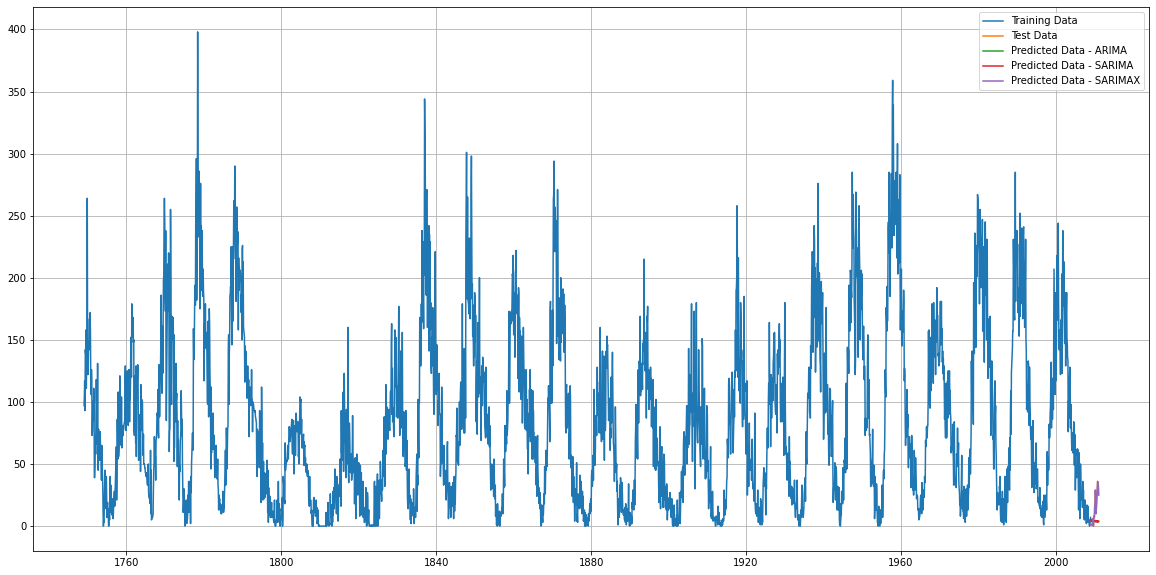

In [70]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,df_fc['Avg_sunspot_count_forecast'],label='Predicted Data - ARIMA')
plt.plot(test.index,SARIMA_predictions,label='Predicted Data - SARIMA')
plt.plot(test.index,SARIMAX_predictions,label='Predicted Data - SARIMAX')
plt.legend(loc='best')
plt.grid();

### Calculating RSME and MAPE

In [71]:
#rmse
rmse = sqrt(mean_squared_error(test.Avg_sunspot_count,SARIMAX_predictions))
print(rmse)

2.4537847797208895e-14


In [72]:
mape = MAPE(test.Avg_sunspot_count,SARIMAX_predictions)
print(mape)

1.3212539029356884e-13


In [73]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse,'Test MAPE': mape}
                           ,index=['SARIMAX(1, 1, 1)(1, 1, 1)7'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE,Test MAPE
"ARIMA(1,1,1)",1.585157e+01,inf
"SARIMA(1, 1, 1)(0, 1, 1)7",1.597615e+01,inf
"SARIMAX(1, 1, 1)(1, 1, 1)7",2.453785e-14,1.321254e-13


### TES Model

In [74]:

model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive')

In [75]:
model_TES = model_TES.fit(optimized=True)
model_TES.summary()

Dep. Variable:,Avg_sunspot_count,No. Observations:,3119
Model:,ExponentialSmoothing,SSE,2331945.036
Optimized:,True,AIC,20670.253
Trend:,Additive,BIC,20766.977
Seasonal:,Additive,AICC,20670.474
Seasonal Periods:,12,Date:,"Sun, 19 Dec 2021"
Box-Cox:,False,Time:,19:01:15
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.4646195,alpha,True
smoothing_trend,9.999e-05,beta,True


In [76]:
TES_predictions =  model_TES.forecast(len(test))

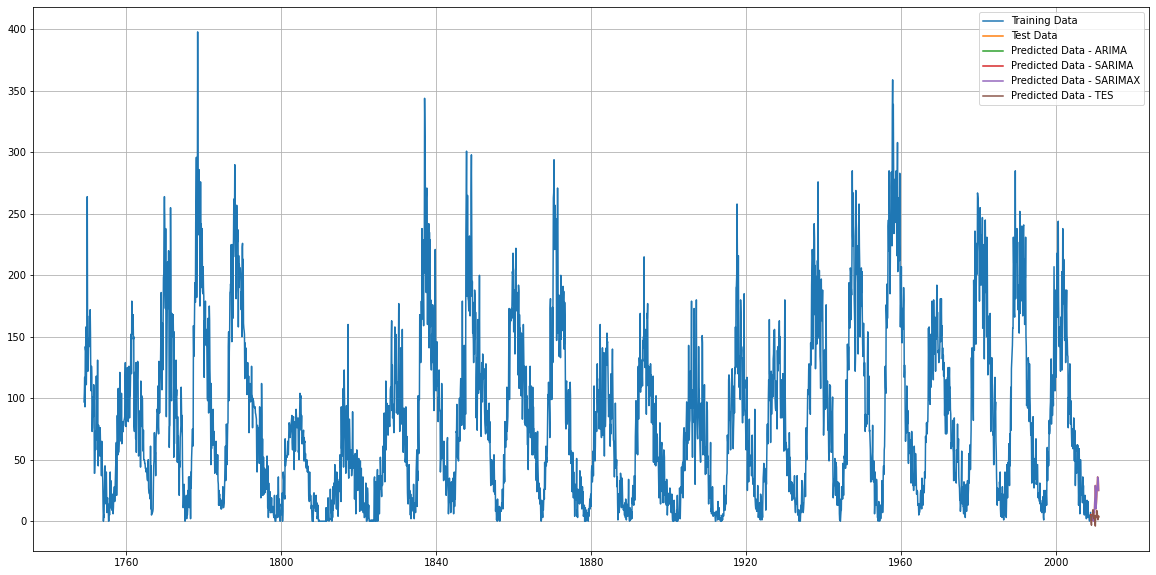

In [77]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,df_fc['Avg_sunspot_count_forecast'],label='Predicted Data - ARIMA')
plt.plot(test.index,SARIMA_predictions,label='Predicted Data - SARIMA')
plt.plot(test.index,SARIMAX_predictions,label='Predicted Data - SARIMAX')
plt.plot(test.index,TES_predictions,label='Predicted Data - TES')
plt.legend(loc='best')
plt.grid();

In [78]:
rmse = sqrt(mean_squared_error(test.Avg_sunspot_count,TES_predictions))
print(rmse)

16.79144965972987


In [79]:
mape = MAPE(test['Avg_sunspot_count'].values,TES_predictions.values)
print(mape)

inf


In [80]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse,'Test MAPE': mape}
                           ,index=['TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE,Test MAPE
"ARIMA(1,1,1)",1.585157e+01,inf
"SARIMA(1, 1, 1)(0, 1, 1)7",1.597615e+01,inf
"SARIMAX(1, 1, 1)(1, 1, 1)7",2.453785e-14,1.321254e-13
TES,1.679145e+01,inf


In [81]:
model_TES = ExponentialSmoothing(df,trend='additive',seasonal='additive')

In [82]:
model_TES = model_TES.fit(optimized=True)

In [83]:
model_TES.summary()

Dep. Variable:,Avg_sunspot_count,No. Observations:,3144
Model:,ExponentialSmoothing,SSE,2267241.452
Optimized:,True,AIC,20722.108
Trend:,Additive,BIC,20818.960
Seasonal:,Additive,AICC,20722.327
Seasonal Periods:,12,Date:,"Sun, 19 Dec 2021"
Box-Cox:,False,Time:,19:01:16
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.4556527,alpha,True
smoothing_trend,0.0081228,beta,True


In [84]:
forecast= model_TES.forecast(120)

In [85]:
forecast.tail()

2020-08-31   -3.989420
2020-09-30   -7.238040
2020-10-31   -9.649243
2020-11-30   -8.047256
2020-12-31   -9.081094
Freq: M, dtype: float64

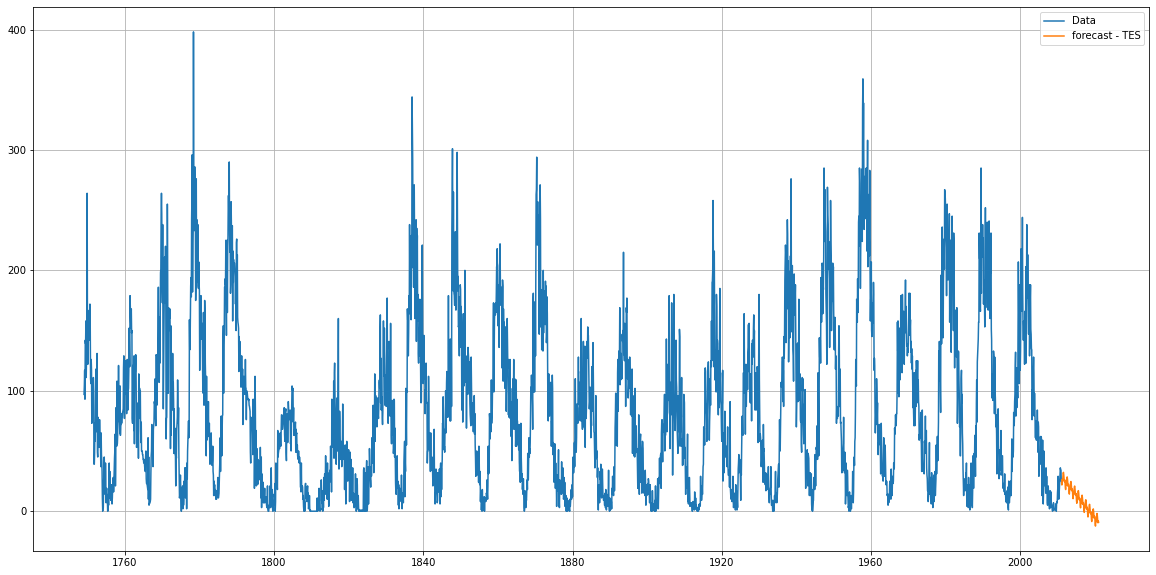

In [86]:
plt.plot(df,label='Data')
plt.plot(forecast,label='forecast - TES')
plt.legend(loc='best')
plt.grid();

In [87]:
df_final=pd.DataFrame(forecast)

In [88]:
df_final

,0
2011-01-31,23.744862
2011-02-28,21.771217
2011-03-31,26.443341
2011-04-30,25.324268
2011-05-31,27.403353
...,...
2020-08-31,-3.989420
2020-09-30,-7.238040
2020-10-31,-9.649243
2020-11-30,-8.047256


In [89]:
df_final.to_csv('shankar2.csv')